In [426]:
from src import Prep
from src.Time_Series_Helper_Funcs import *
import warnings
warnings.filterwarnings('ignore')

In [198]:
%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [369]:
%autoreload

# Load in, clean, sort, and filter data

In [4]:
df = Prep.prep()

1 of 11 |    Reading in first dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 33.597841 seconds.
2 of 11 |    Reading in second dataset. 
             Using 4/60 features/columns: 'Installation Date', 'System Size', 'Total Installed Price' , 'Customer Segment' 
             Changing -9999 values to null
Elapsed time is 2.571830 seconds.
3 of 11 |    Concatenating datasets together
4 of 11 |    Refining to only RES Customer Segment
5 of 11 |    Cleaning up column names
6 of 11 |    Sorting values by installation_date
7 of 11 |    Assigning installation_date as index
8 of 11 |    Replacing all null values with median values from same year
9 of 11 |    Adusting prices for inflation
Elapsed time is 50.408397 seconds.
10 of 11|    Creating target variable: cost_per_watt
11 of 11|    Removing > 1600 outliers above $25 per watt
Prep complete 
 ------

In [5]:
y = time_frame(df)

# Run through basic regression models: OLS, Linear OLS, and Random Forest Regressor 

In [289]:
%autoreload

In [439]:
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
score_table(y, ols_model, linear_model, rf_model)

,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.189762,0.120843,0.347625,0.688719
LINEAR,0.555970,0.555970,0.745634,0.953549
RF,0.073019,0.020496,0.143165,0.713491


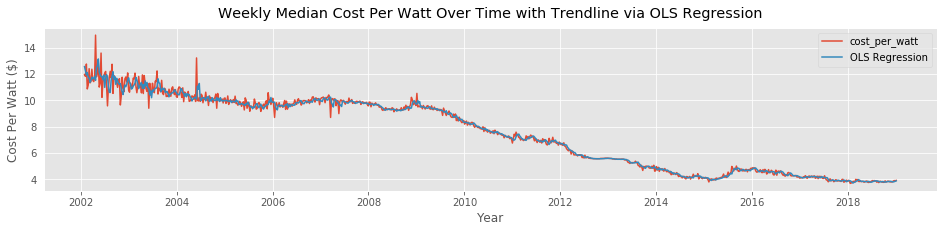

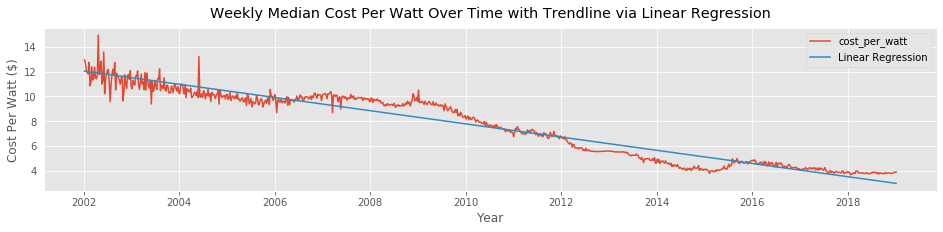

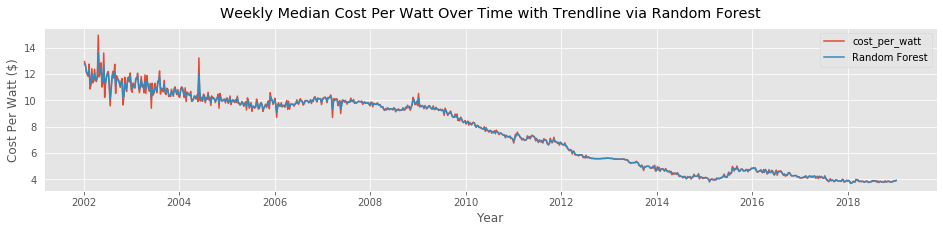

In [294]:
plot_regres_model(y[3:], ols_trend, 'OLS Regression')
plot_regres_model(y, linear_trend, 'Linear Regression')
plot_regres_model(y, rf_trend, 'Random Forest')

In [477]:
print('covariance matrix for ols model \n', ols_model.cov_params())
print('---------------------------')
print('covariance matrix for linear model \n', linear_model.cov_params())
print('---------------------------')
print('covariance matrix for robust linear model \n', rf_model.feature_importances_
      cov_params())

covariance matrix for ols model 
            Intercept      Lag1      Lag2      Lag3
Intercept   0.001208 -0.000045 -0.000048 -0.000049
Lag1       -0.000045  0.000937 -0.000472 -0.000458
Lag2       -0.000048 -0.000472  0.000950 -0.000472
Lag3       -0.000049 -0.000458 -0.000472  0.000935
---------------------------
covariance matrix for linear model 
           const            x1
const  0.002094 -3.534835e-06
x1    -0.000004  7.952384e-09
---------------------------
covariance matrix for robust linear model 
           const            x1
const  0.002183 -3.685158e-06
x1    -0.000004  8.290570e-09


# Run through basic average model

In [91]:
simple_move(y)

cost_1weekago [
 MAE: 0.05 
 MSE: 0.0 
 RMSE: 0.07 ]
cost_3weeksago [
 MAE: 0.07 
 MSE: 0.01 
 RMSE: 0.09 ]
None None


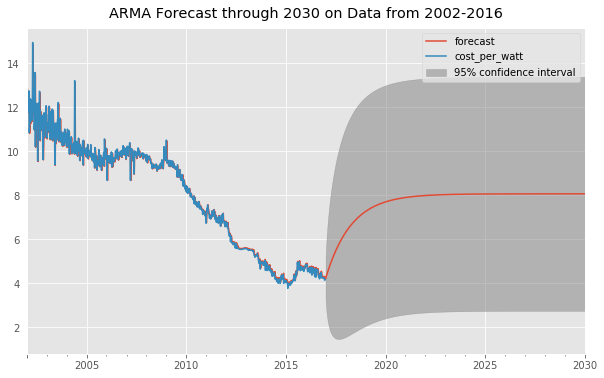

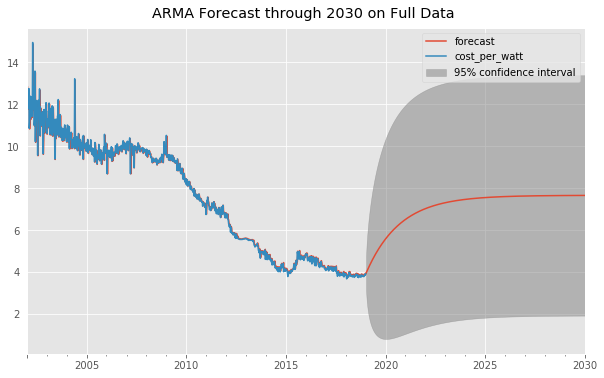

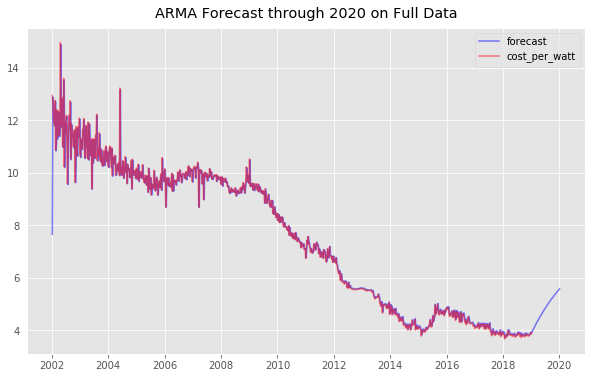

In [324]:
#ARMA ON FULL DATA

first_14 = y.loc[y.index.year <2017]
last_few = y.loc[y.index.year >2016]

mod = ARMA(first_14, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2017-2030 on Data from 2002-2016')
plt.show()

mod = ARMA(y, order=(1,0), freq='W', )
res = mod.fit()
res.plot_predict(end='2030')
plt.title('ARMA Forecast for 2019-2030 on Full Data ')
plt.show()

plt.plot(res.predict(end='2020'), alpha=0.5, color='blue', label='forecast')
plt.plot(y, color='red', alpha=0.5, label='cost_per_watt')
plt.title('ARMA Forecast for 2019-2020 on Full Data')
plt.legend()

print('ARMA Condfidence Intervals', res.conf_int())
res.summary()

# Prepare data for time series analysis

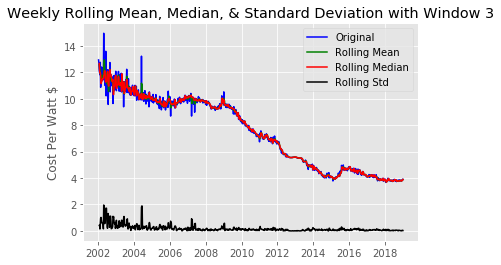

Results of Dickey-Fuller Test:
Test Statistic                  -1.323589
p-value                          0.618312
#Lags Used                      21.000000
Number of Observations Used    866.000000
Critical Value (1%)             -3.437924
Critical Value (5%)             -2.864883
Critical Value (10%)            -2.568550
dtype: float64


In [9]:
rolling_plot(y)
dfuller_test(y)

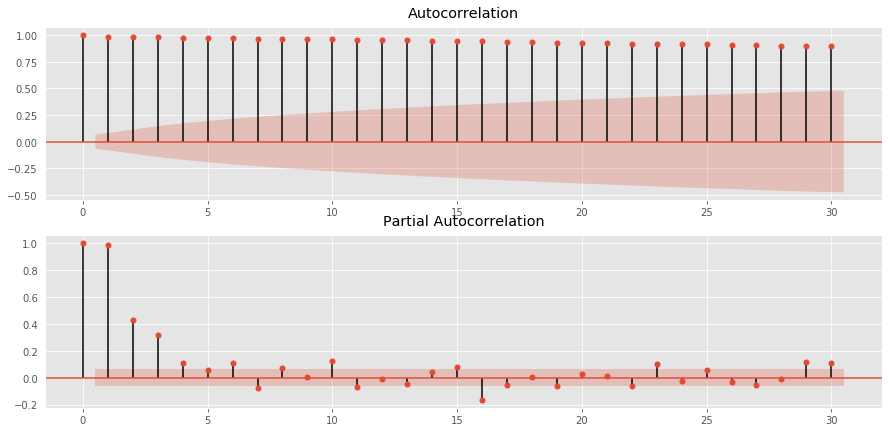

In [47]:
autocor_plots(y)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


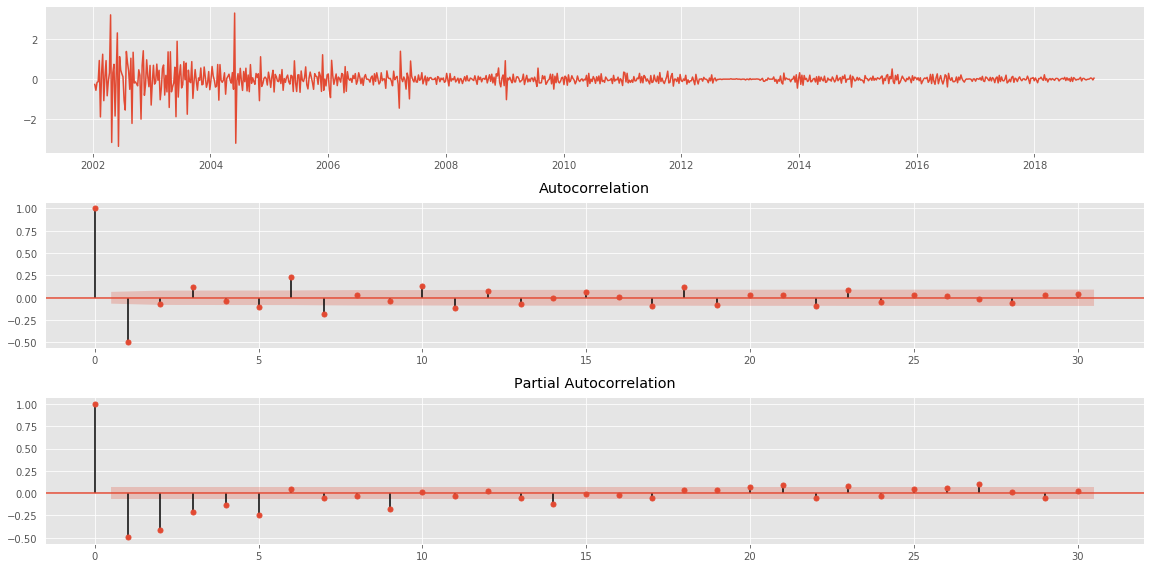

In [42]:
diff = get_differences(y)

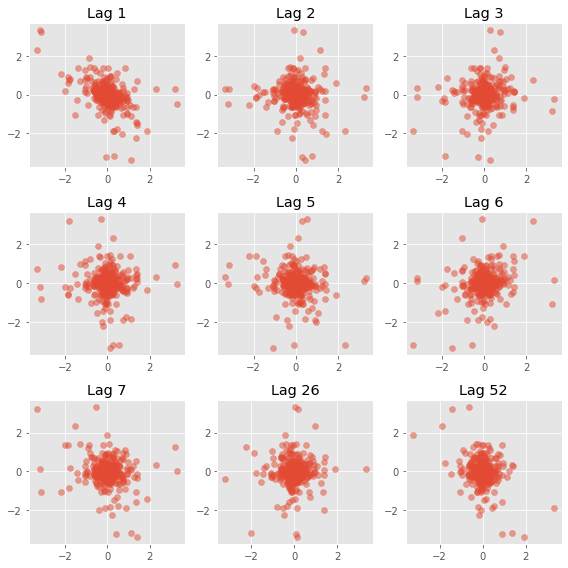

In [11]:
plot_ac_scat(diff)

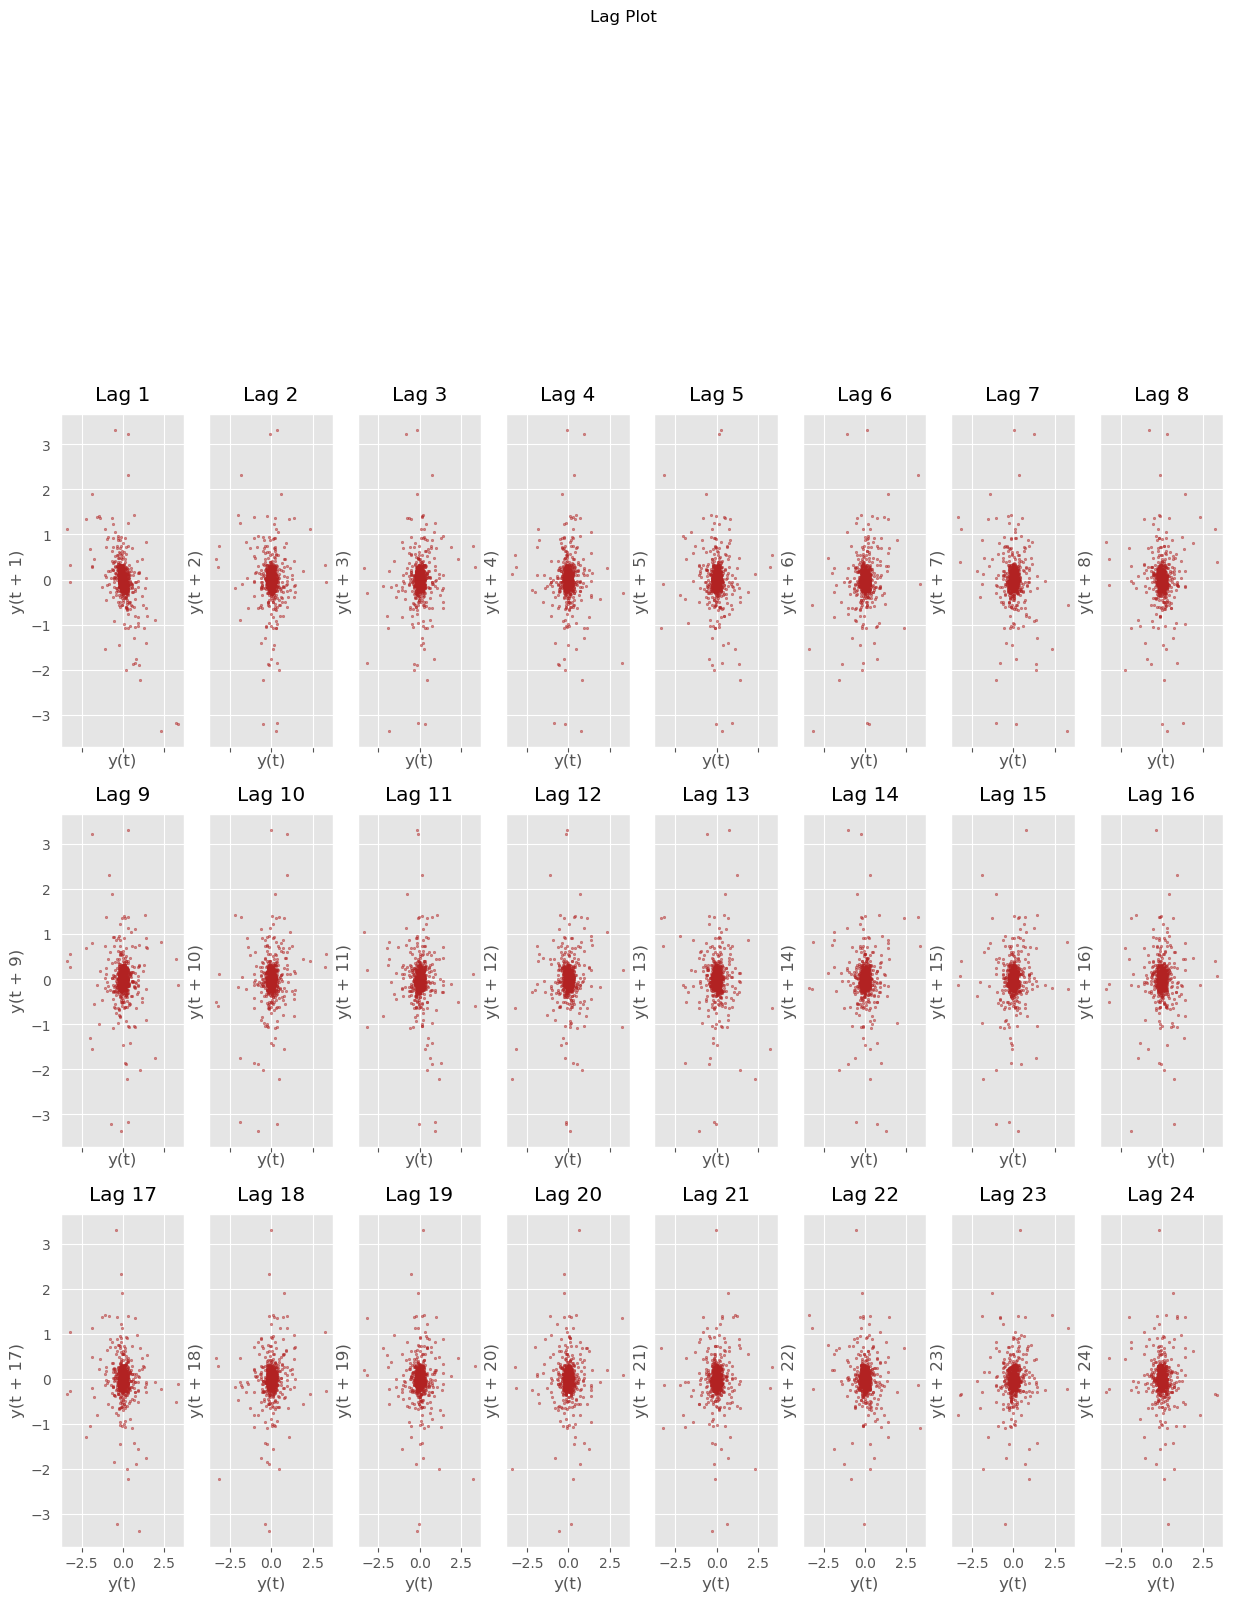

In [14]:
lag_plots(diff)

In [40]:
test_for_stationarity(diff)

ADF p-value: 0.00
Achieved stationarity! Reject ADF H0.


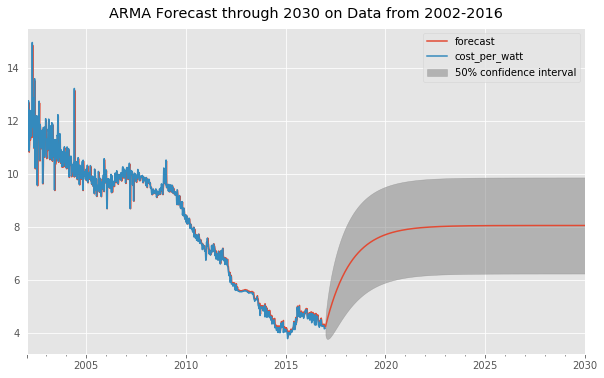

Confidence Intervals for ARMA Forecast through 2030 on Data from 2002-2016                             0          1
const                6.052687  10.046816
ar.L1.cost_per_watt  0.972351   0.997305
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood                -514.325
Method:                       css-mle   S.D. of innovations              0.466
Date:                Thu, 19 Mar 2020   AIC                           1034.651
Time:                        14:12:54   BIC                           1048.633
Sample:                    01-13-2002   HQIC                          1040.028
                         - 12-25-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

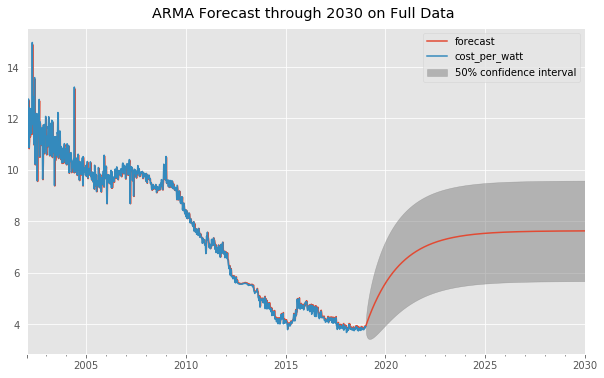

Confidence Intervals for ARMA Forecast through 2030 on Full Data                             0         1
const                5.333997  9.923639
ar.L1.cost_per_watt  0.978300  0.998629
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -530.292
Method:                       css-mle   S.D. of innovations              0.439
Date:                Thu, 19 Mar 2020   AIC                           1066.584
Time:                        14:12:57   BIC                           1080.948
Sample:                    01-13-2002   HQIC                          1072.075
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

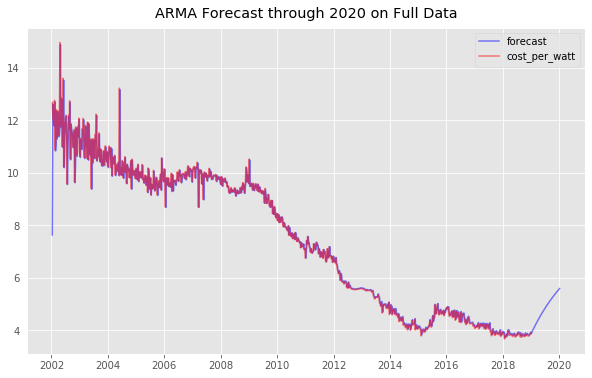

Confidence Intervals for ARMA Forecast through 2020 on Full Data                             0         1
const                5.333997  9.923639
ar.L1.cost_per_watt  0.978300  0.998629
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -530.292
Method:                       css-mle   S.D. of innovations              0.439
Date:                Thu, 19 Mar 2020   AIC                           1066.584
Time:                        14:12:57   BIC                           1080.948
Sample:                    01-13-2002   HQIC                          1072.075
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

In [374]:
ARMA_plots(y)

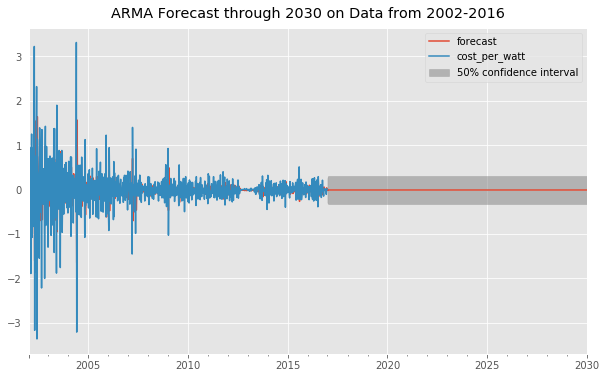

Confidence Intervals for ARMA Forecast through 2030 on Data from 2002-2016                             0         1
const               -0.030252  0.008003
ar.L1.cost_per_watt -0.553421 -0.431490
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood                -406.005
Method:                       css-mle   S.D. of innovations              0.407
Date:                Thu, 19 Mar 2020   AIC                            818.011
Time:                        14:17:30   BIC                            831.993
Sample:                    01-13-2002   HQIC                           823.388
                         - 12-25-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------

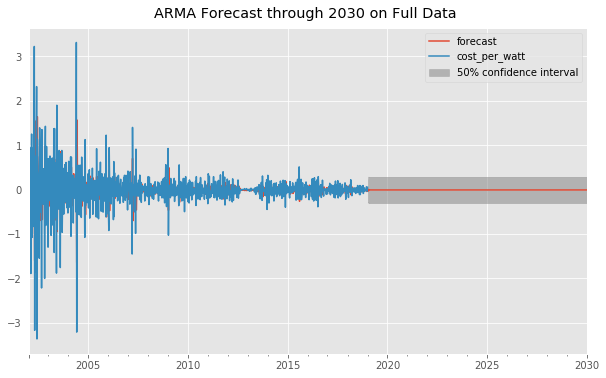

Confidence Intervals for ARMA Forecast through 2030 on Full Data                             0         1
const               -0.027008  0.006780
ar.L1.cost_per_watt -0.549122 -0.434644
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -407.101
Method:                       css-mle   S.D. of innovations              0.383
Date:                Thu, 19 Mar 2020   AIC                            820.201
Time:                        14:17:30   BIC                            834.565
Sample:                    01-13-2002   HQIC                           825.692
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

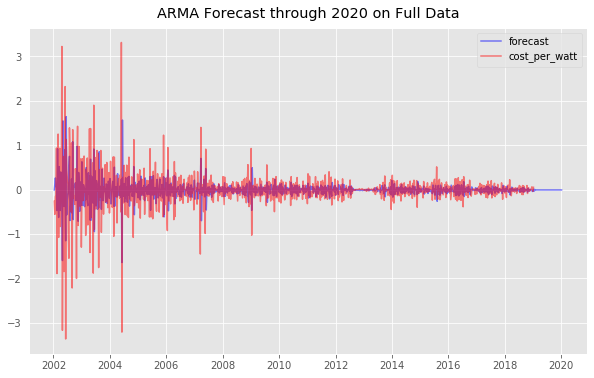

Confidence Intervals for ARMA Forecast through 2020 on Full Data                             0         1
const               -0.027008  0.006780
ar.L1.cost_per_watt -0.549122 -0.434644
                              ARMA Model Results                              
Dep. Variable:          cost_per_watt   No. Observations:                  887
Model:                     ARMA(1, 0)   Log Likelihood                -407.101
Method:                       css-mle   S.D. of innovations              0.383
Date:                Thu, 19 Mar 2020   AIC                            820.201
Time:                        14:17:30   BIC                            834.565
Sample:                    01-13-2002   HQIC                           825.692
                         - 01-06-2019                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const  

In [383]:
ARMA_plots(diff)

In [441]:
#ORIGINAL REGRESSION
ols_model, ols_trend = lag_ols_model(y)[0], lag_ols_model(y)[1]
linear_model, linear_trend = linear_ols_model(y)[0], linear_ols_model(y)[1]
rf_model, rf_trend = randomforest_model(y)[0], randomforest_model(y)[1]
print('Regression Models on original data')
score_table(y, ols_model, linear_model, rf_model)


Regression Models on original data


,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.189762,0.120843,0.347625,0.688719
LINEAR,0.555970,0.555970,0.745634,0.953549
RF,0.071960,0.019184,0.138508,0.737482


In [450]:
# RUN STATIONARY DATA THROUGH ORIGINAL REGRESSION
tsols_model, tsols_trend = stat_lag_ols_model(diff)[0], stat_lag_ols_model(diff)[1]
tslinear_model, tslinear_trend = stat_linear_ols_model(diff)[0], stat_linear_ols_model(diff)[1]
tsrf_model, tsrf_trend = stat_randomforest_model(diff)[0], stat_randomforest_model(diff)[1]
print('Regression Models on differenced stationary data')
stat_score_table(diff, tsols_model, tslinear_model, tsrf_model)

Regression Models on differenced stationary data


,MAE,MSE,RMSE,P_VALUE
Models,,,,
OLS,0.184800,0.115255,0.339493,5.272663e-09
LINEAR,0.227956,0.227956,0.477447,9.672850e-01
RF,0.125922,0.063275,0.251544,1.463611e-13


#### REFLECTION
OLS did slightly better<br>
LINEAR did much better<br>
RF did much worse<br>

In [457]:
np.cov(rf_trend)

array(7.26980447)

In [453]:
np.cov(ols_trend)

array(7.15487872)

In [63]:
from statsmodels.tsa.stattools import pacf_ols, pacf, arma_order_select_ic

In [ ]:
arma_order_select_ic

In [ ]:
from from statsmodels.tsa import 

In [325]:
X = add_constant(np.arange(1, len(y) + 1))